In [1]:
# packages used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.patches import Ellipse

# set up plot formatting 
sns.set(color_codes=True)
sns.set(font_scale=1)
sns.set_style("whitegrid")

# Sample mean parameter replications 
dfM = pd.read_csv(r'FMDVMeansMay9.csv')

# Individual host median parameters 
dfInd = pd.read_csv(r'QualCompInd.csv')

In [2]:
# give dataframe columns "nice" names for plotting
dfMViral = dfInd[["Serotype","k","I0","b","delta","r",
                  "P0","TimeMax","cumViral","maxViral",
                  "infectStart",'A0']]
dfMViral.columns =['ID', 'k', '$I_0$','b','$\delta$','r',
                   '$P_0$','T. max', 'Cum. v', "Max v", 
                   "Inf s. t.",'$A_0$']

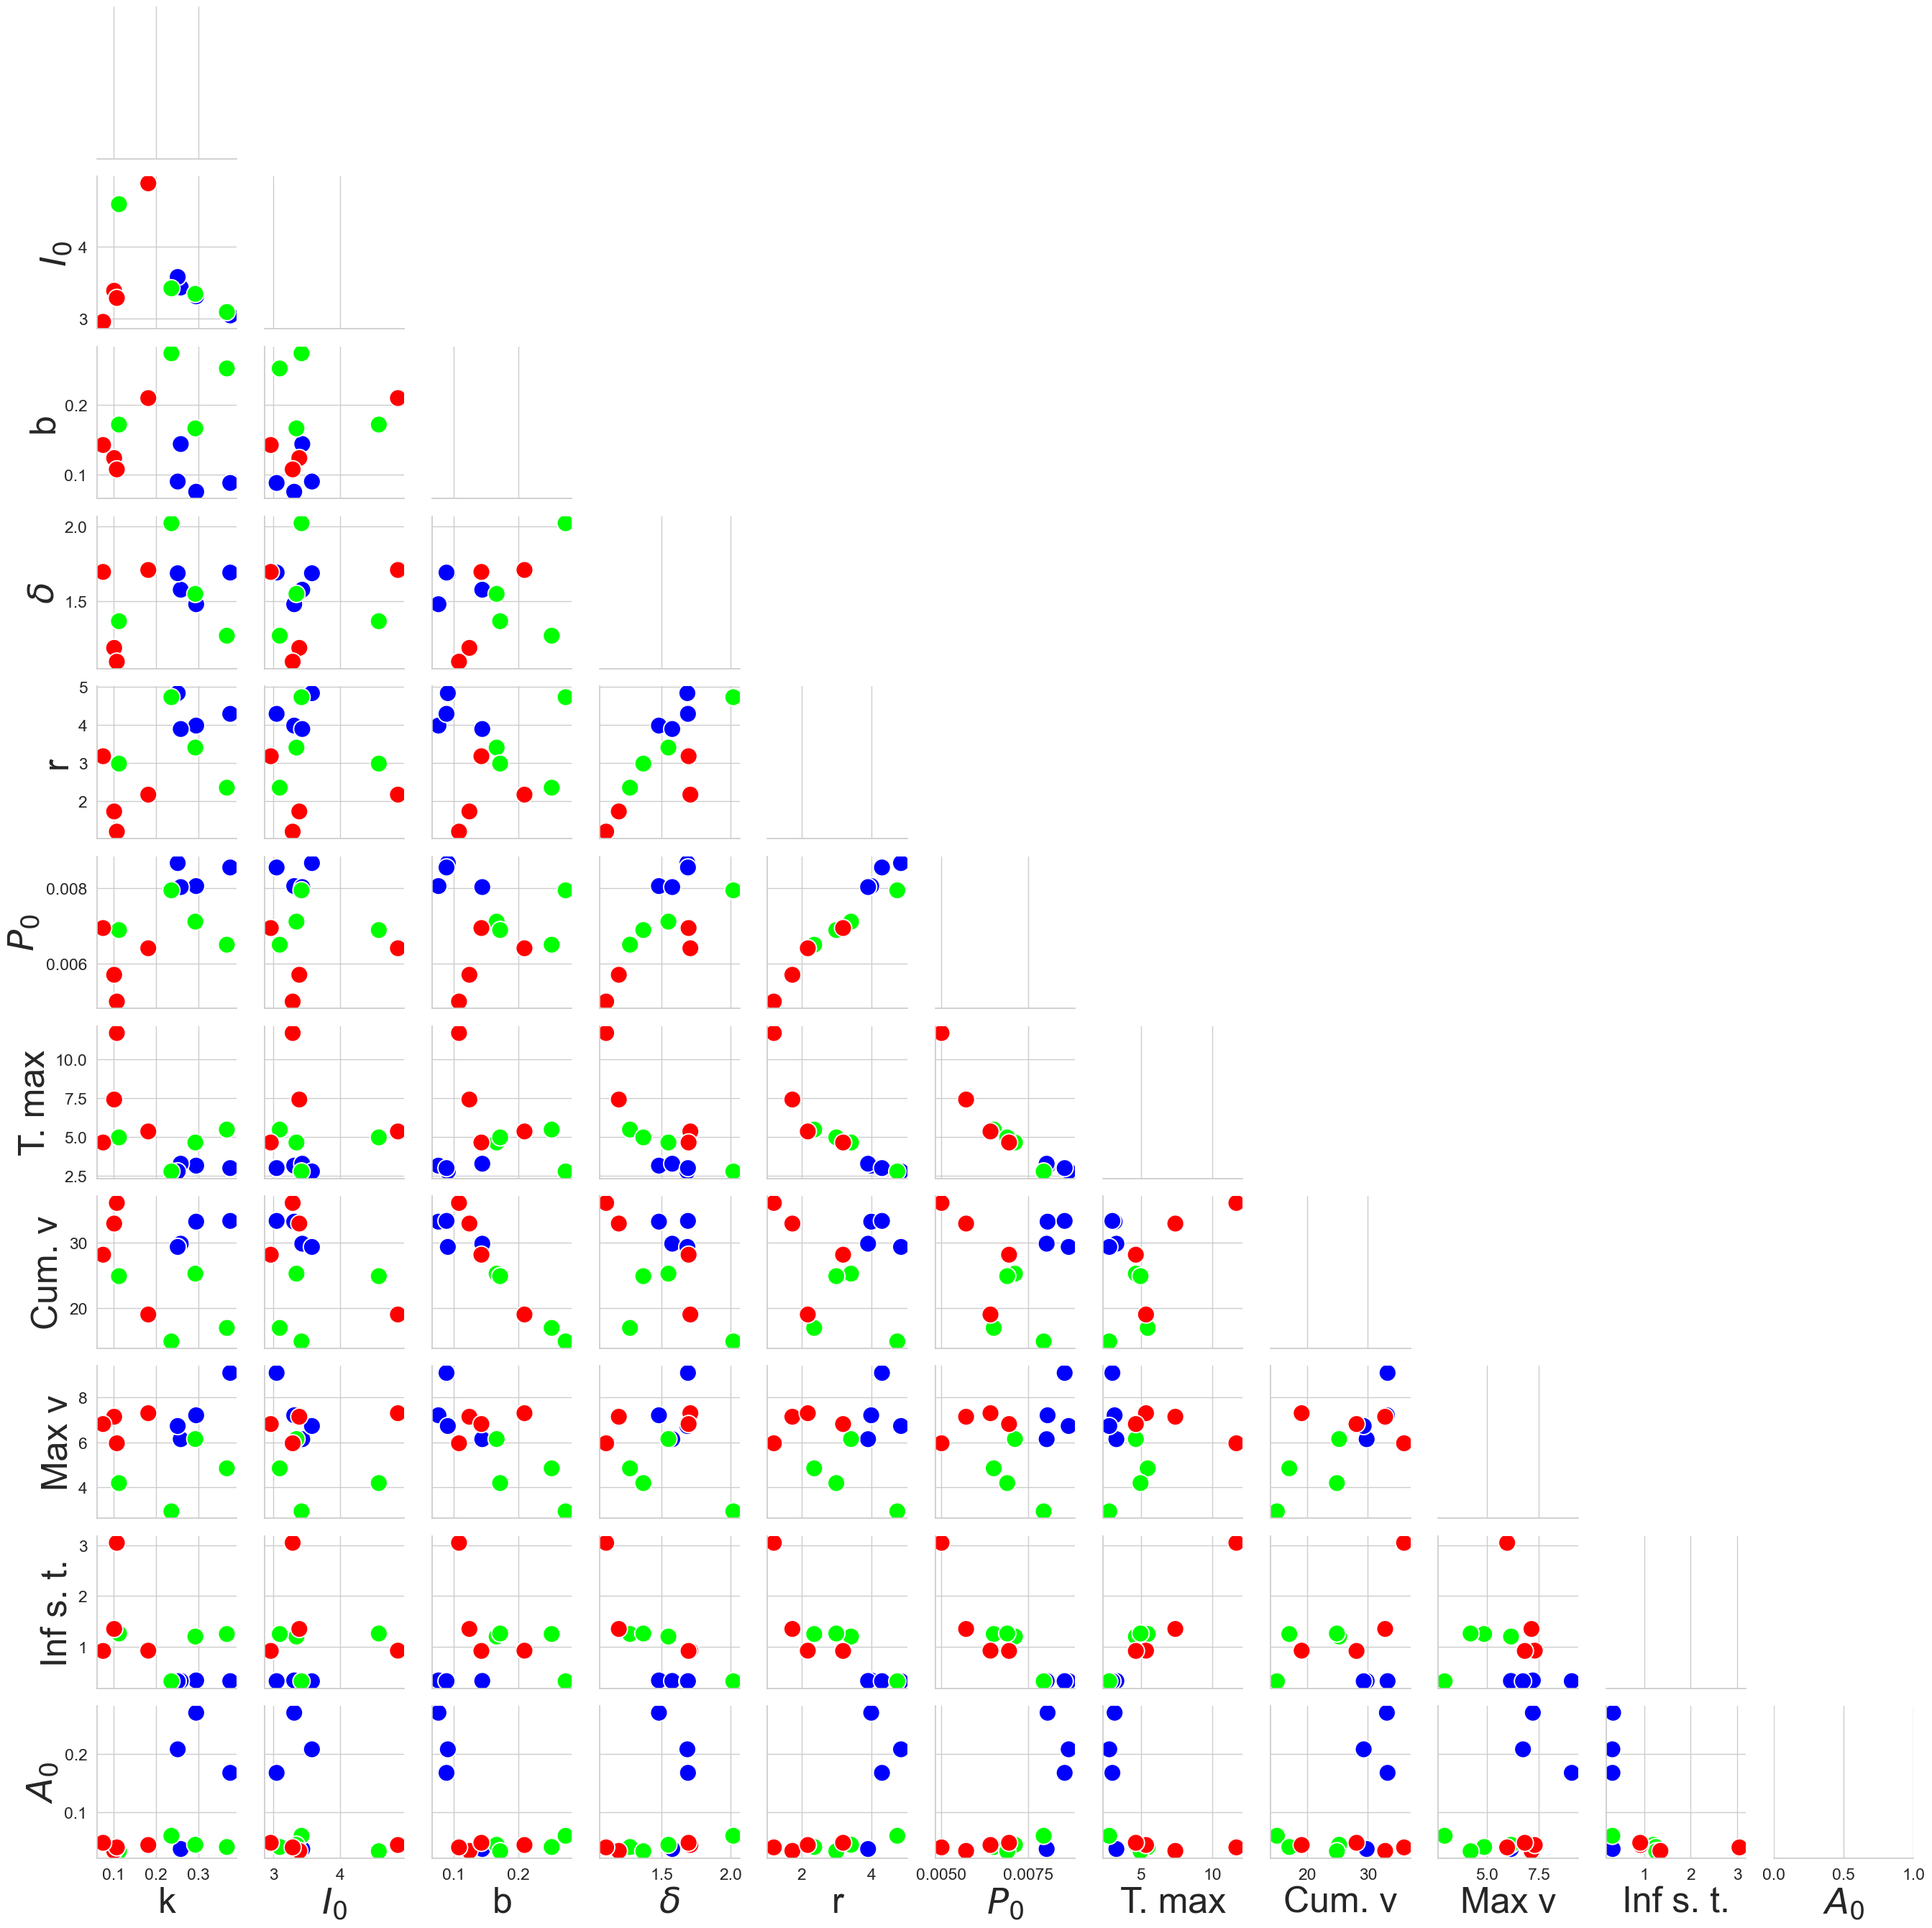

In [3]:
# plot formatting 
sns.set(rc={"figure.figsize":(5, 18)},style='whitegrid') 
sns.set_context("notebook", font_scale=1.5,rc={"axes.labelsize":36,"figure.figsize":(5, 5)})

# group by serotpye
# pair plot for median parameters
h = sns.pairplot(dfMViral, hue = 'ID',
                 palette=['#0000ff','#00ff00','#ff0000'],
                 corner=True,plot_kws = {"s":300},diag_kind='KDE')
h._legend.remove()

# get rid of the kde plots in the corners as that just repeats information
# that is presented elsewhere in the manuscript
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

h.map_diag(hide_current_axis)

# show the plot
plt.show()

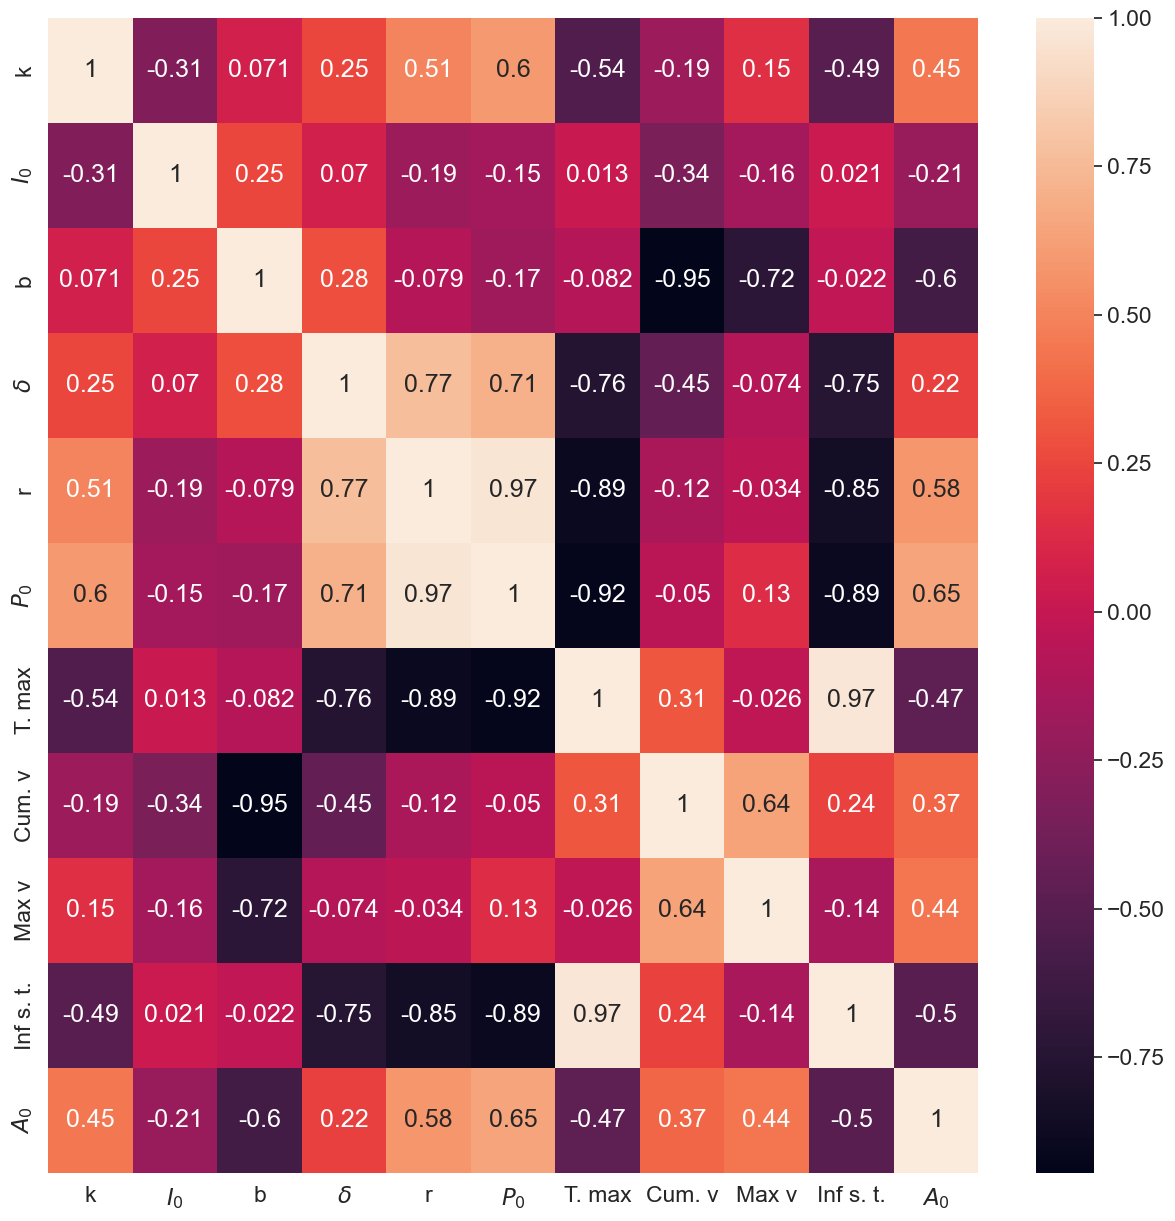

In [4]:
# correlation between median model parameters 
# default correlation of .corr() in pandas is pearson

# plot formatting 
plt.figure(figsize=(15,15))

# make the heatmap and annotate with correlation values 
sns.heatmap(dfMViral[dfMViral.columns.values[1:12]].corr(),annot=True)

# display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


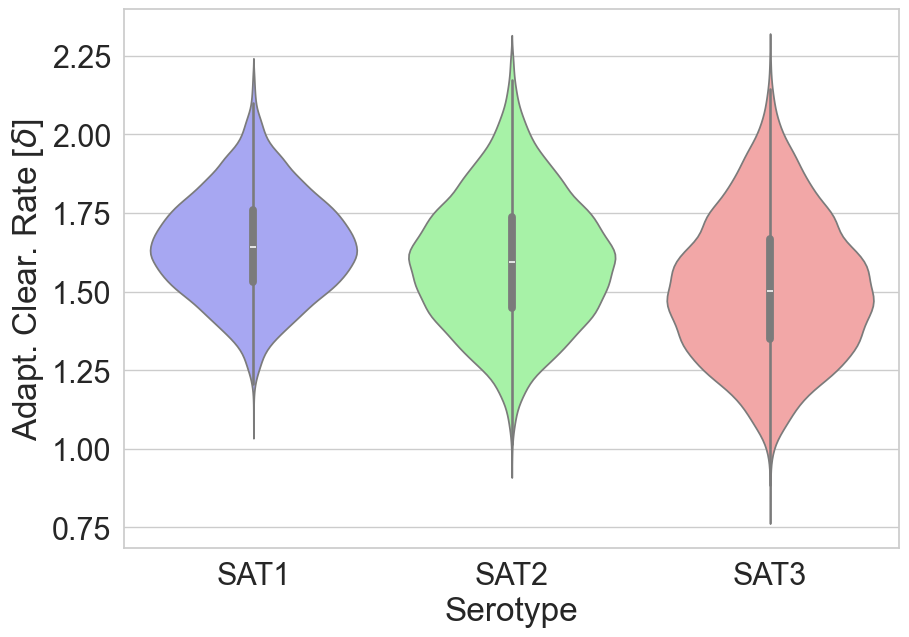

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


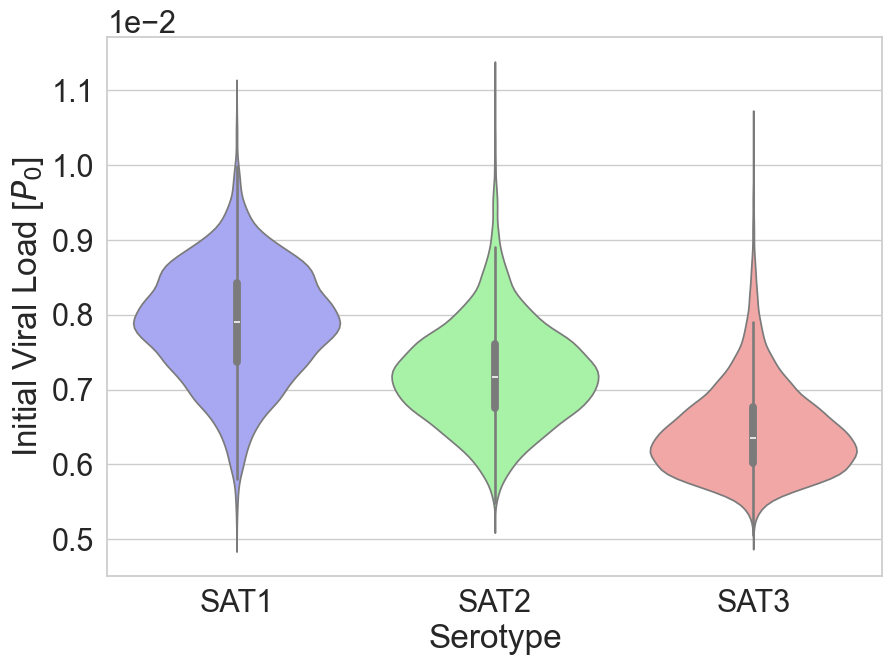

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


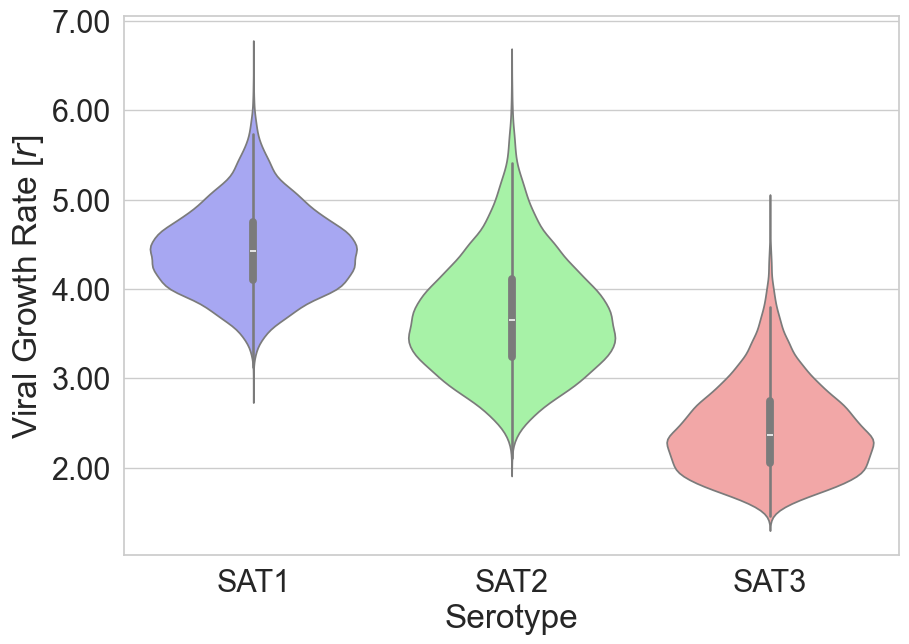

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


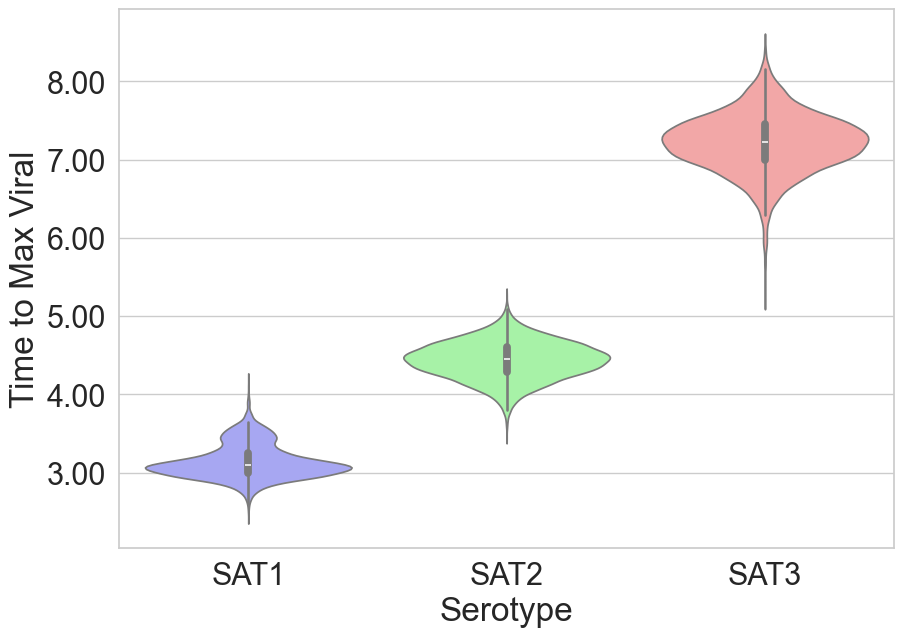

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


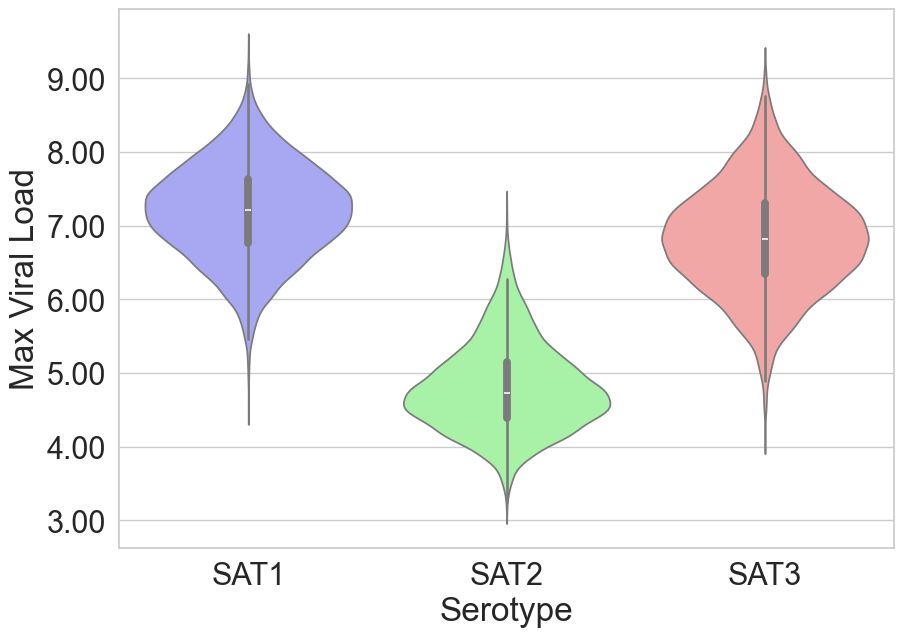

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


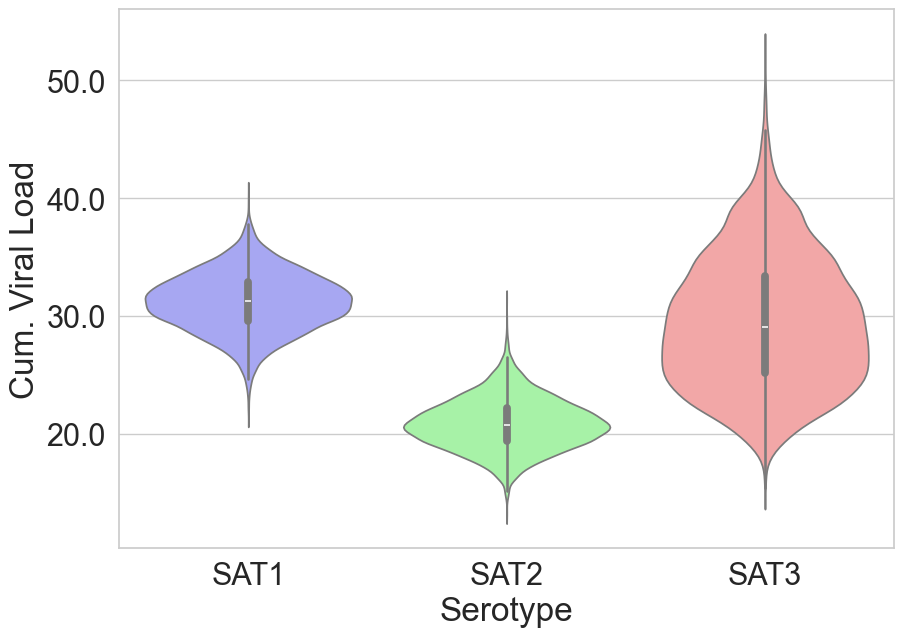

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


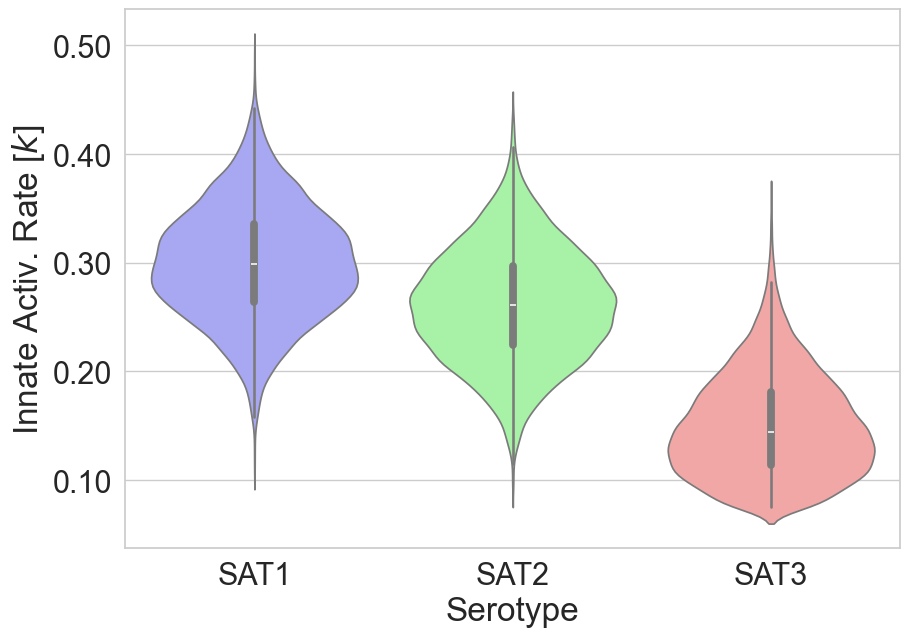

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


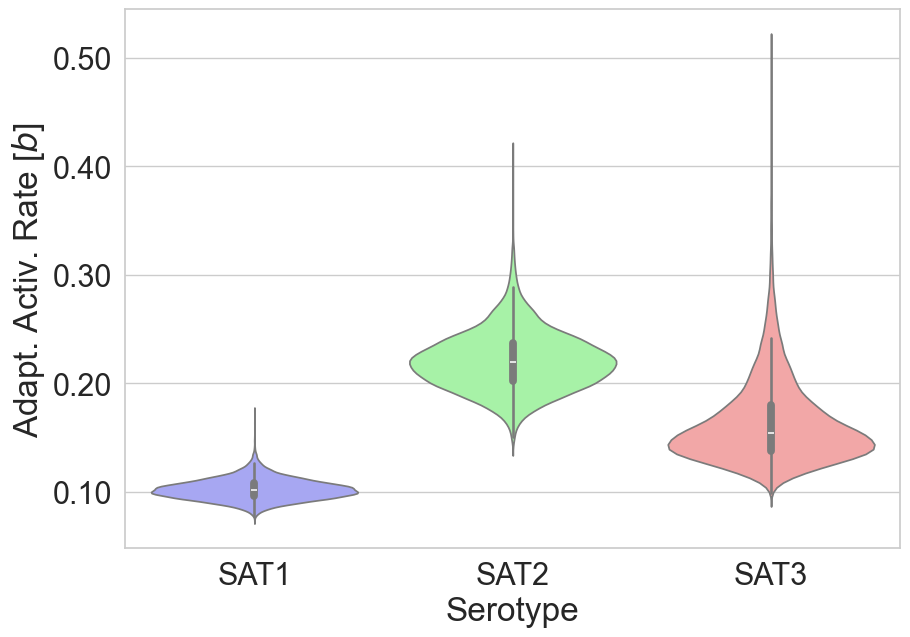

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


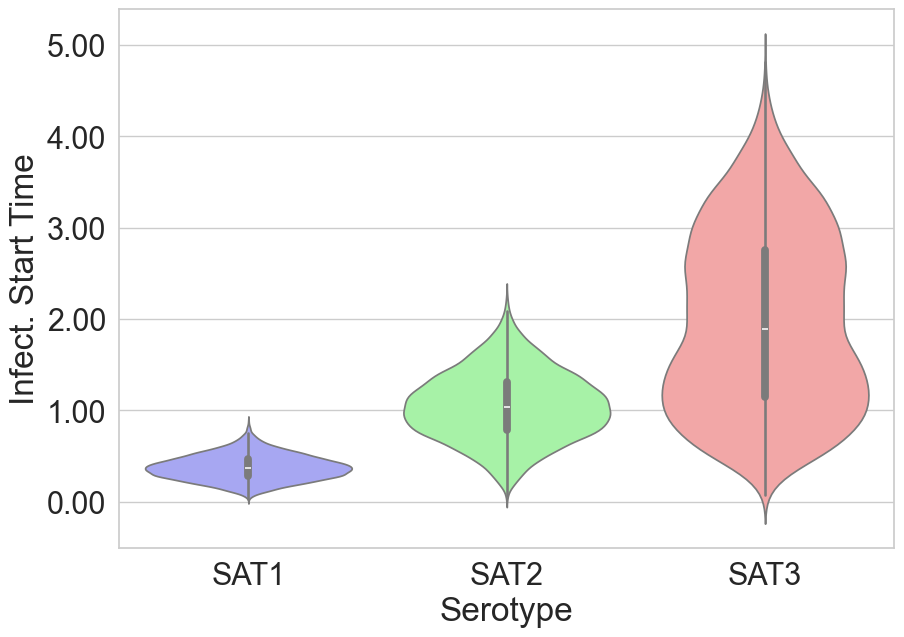

In [5]:
# generate violin plots for serotype means
# set plot context
sns.set(rc={"figure.figsize":(10, 7)},style='whitegrid') 
sns.set(font_scale = 2,style="whitegrid")

#########################################
#########################################
#########################################
# adaptive clearence rate 
h = sns.violinplot(data=dfM, x="ID", y="delta",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False, 
                   
                )
# plot formatting 
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Adapt. Clear. Rate [$\delta$]" , size = 24 ) 
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

#########################################
#########################################
#########################################
# Initial viral load  


h = sns.violinplot(data=dfM, x="ID", y="P0",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
# plot formatting 
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Initial Viral Load [$P_0$]" , size = 24 ) 
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
plt.ticklabel_format(style='sci',scilimits=[-2,5], axis='y')

plt.show()

#########################################
#########################################
#########################################
# Viral replication   

h = sns.violinplot(data=dfM, x="ID", y="r",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
# formatting
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Viral Growth Rate [$r$]" , size = 24 ) 

hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

#########################################
#########################################
#########################################
# Time max viral

h = sns.violinplot(data=dfM, x="ID", y="tmax",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
# formatting 
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Time to Max Viral" , size = 24 ) 
hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

#########################################
#########################################
#########################################
# Time max viral

h = sns.violinplot(data=dfM, x="ID", y="vmax",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )


# formatting 
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Max Viral Load" , size = 24 ) 

hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()

h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

#########################################
#########################################
#########################################
# Cum viral

h = sns.violinplot(data=dfM, x="ID", y="cumviral",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
# formatting 
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Cum. Viral Load" , size = 24 ) 

hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
h.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.show()

#########################################
#########################################
#########################################
# Innate activation 
h = sns.violinplot(data=dfM, x="ID", y="k",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
# formatting 
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Innate Activ. Rate [$k$]" , size = 24 ) 

hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

#########################################
#########################################
#########################################
# Adaptive activation 

h = sns.violinplot(data=dfM, x="ID", y="b",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
# formatting 
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Adapt. Activ. Rate [$b$]" , size = 24 ) 

hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=24)
hh.remove()

h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

#########################################
#########################################
#########################################
# start time 
h = sns.violinplot(data=dfM, x="ID", y="start",hue="ID",palette=['#9a9aff','#9aff9a','#ff9a9b'],dodge =False
                )
# formatting
h.set_xlabel( r"Serotype" , size = 24 ) 
h.set_ylabel( r"Infect. Start Time" , size = 24 ) 

hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=24)
hh.remove()
h.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()


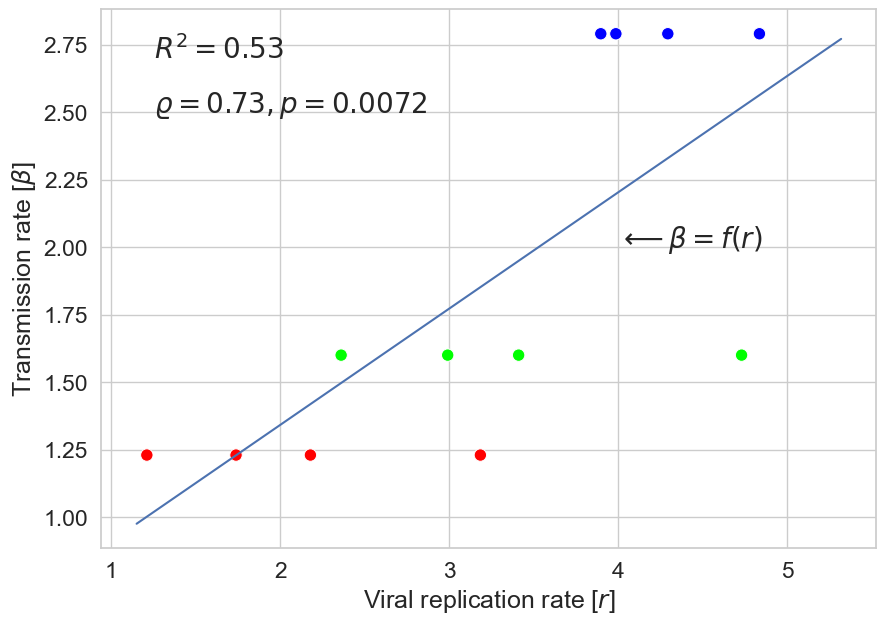

(0.5313830580207655,
 PearsonRResult(statistic=0.7289602581902291, pvalue=0.007152642656038594))

In [6]:
# correlation analysis replication and transmission 
# formatting
sns.set(font_scale = 1.5,style="whitegrid")
# scatterplot
h=sns.scatterplot(data = dfInd, x = (dfInd['r']),
                  y = dfInd['Transmission'],
                  palette=['#0000ff','#00ff00','#ff0000'],
                  hue=dfInd['Serotype'],s=80)

plt.gca().legend_.remove()

# linear regression and plot line of best fit 
X = (dfInd['r']).values
X = X.reshape(-1,1)
XX = np.linspace(.95*X.min(),1.1*X.max()).reshape(-1,1)
y = dfInd['Transmission'].values
reg = LinearRegression().fit(X, y)
plt.plot(XX,reg.predict(XX))

# plot labeling 
h.set_xlabel( r"Viral replication rate [$r$]" ) 
h.set_ylabel( r"Transmission rate [$\beta$]") 
plt.text(1.25, 2.7, '$R^2 = 0.53$',fontsize=20)
plt.text(1.25, 2.5, r'$\varrho = 0.73, p = 0.0072$',fontsize=20)
plt.text(4,2,r'$\longleftarrow \beta = f(r)$',fontsize=20)
plt.show()

# print R^2 and correlation values 
r2_score(y, reg.predict(X)), stats.pearsonr(dfInd['r'],dfInd['Transmission'])

0.3708180435533176


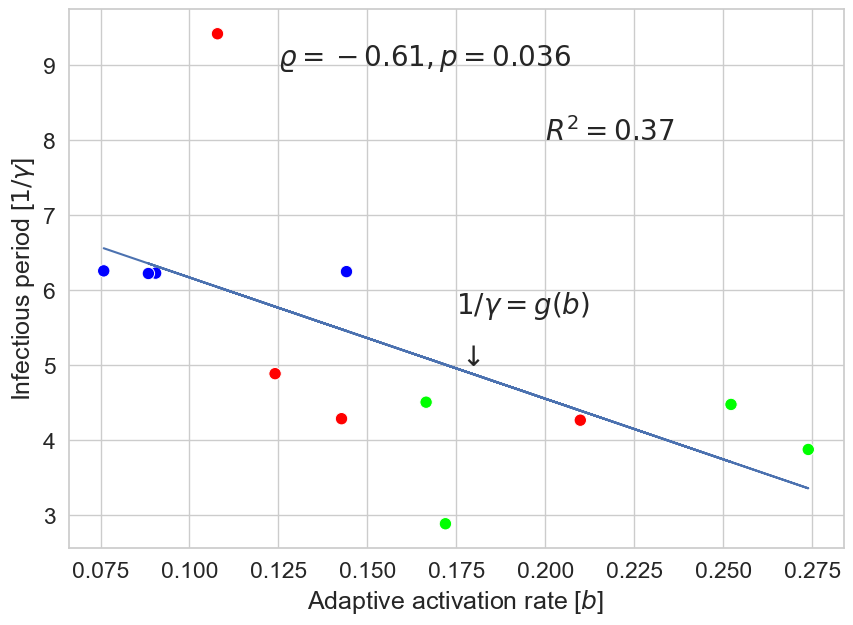

PearsonRResult(statistic=-0.6089483094264386, pvalue=0.03559083615124554)


In [7]:
# correlation between activation and infectious period 
# formatting 

# linear regression 
sns.set(font_scale = 1.5,style="whitegrid")
X = dfInd['b'].values
X = X.reshape(-1,1)
y = dfInd['infectPeriod'].values
reg = LinearRegression().fit(X, y)

# plot prediction 
plt.plot(X, reg.predict(X))

# print metrics 
print(r2_score(y, reg.predict(X)))

xs = np.linspace(np.min(dfInd['b']),np.max(dfInd['b']),20)
xs = xs.reshape(-1,1)

# ad x/y labels 
plt.xlabel(r'Adaptive activation rate [$b$]')
plt.ylabel(r'Infectious period [$1/\gamma$]')

# annotate line of best fit
s='1/γ = g(b)';

# annotate correlation 
s = r'''$\varrho = -0.61, p = 0.036$''';
plt.text(.125,9,s,fontsize=20)

# plot the data 
h = sns.scatterplot(data=dfInd, x="b", y=dfInd["infectPeriod"],hue='Serotype',palette=['#0000ff','#00ff00','#ff0000'],s=80)
hh = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
hh.remove()

# plot the annotations 
plt.text(.175,5.7,r'$1/\gamma = g(b)$',fontsize=20)
plt.text(.175,5,r'$\downarrow$',fontsize=20)
plt.text(.2, 8, '$R^2 = 0.37$',fontsize=20)
plt.show()

# print correlation 
print(stats.pearsonr(dfInd["b"],dfInd["infectPeriod"]))


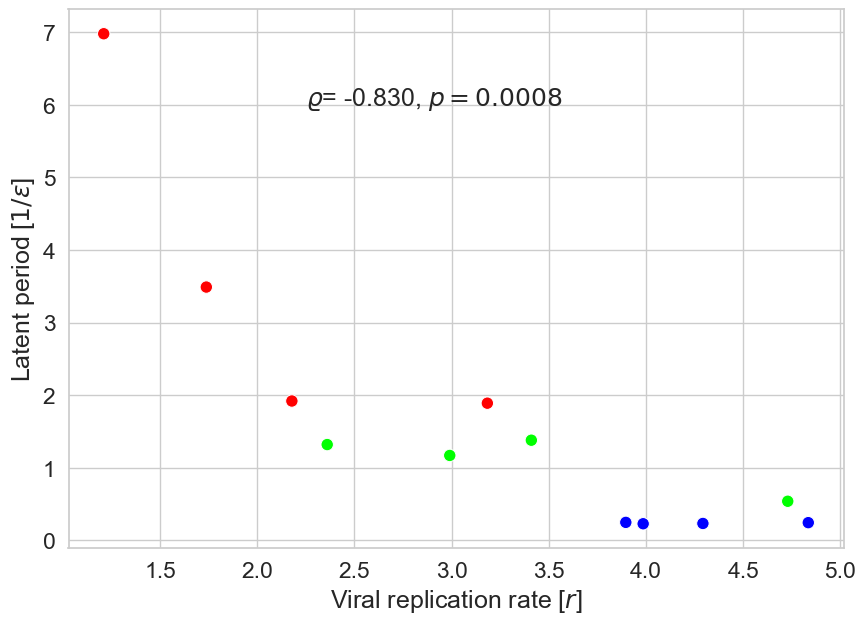

PearsonRResult(statistic=-0.8304782328290239, pvalue=0.0008233019650781257)


In [8]:
# correlation analysis between replication and latent period 
plt.text(2.25,6,r'$\varrho$= -0.830, $p = 0.0008$')

# plot data
h = sns.scatterplot(data=dfInd, x="r", y=dfInd["latentPeriod"],hue='Serotype',palette = ['#0000ff','#00ff00','#ff0000'],s=80)

# formatting 
plt.xlabel(r'Viral replication rate [$r$]')
plt.ylabel(r'Latent period [$1/\epsilon$]')

plt.gca().legend_.remove()
plt.show()

# calculate correlation 
print(stats.pearsonr(dfInd["r"],dfInd["latentPeriod"]))


In [9]:
# generate contour for R0 estimate from within host 
rs = np.linspace(1,6,100)
bs = np.linspace(0.075,0.465,100)
r, b = np.meshgrid(rs, bs)

# calculate R0 from within host as product of lines of best fit 
# from above
r0s = (0.4307*r + 0.4804)*(-16.16*b + 7.788)

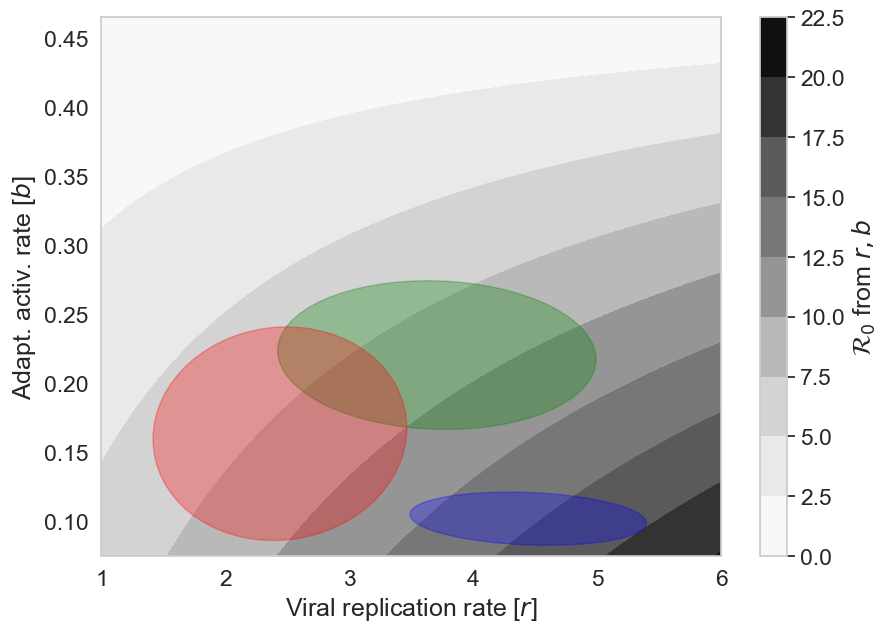

In [10]:
# plot the contour 
plt.contourf(r,b,r0s,cmap="Greys")
cbar = plt.colorbar()
cbar.set_label(r'$\mathcal{R}_0$ from $r,b$')

# plot confidence ell
def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

if __name__ == '__main__':
    # Sat 1 mean data
    points = dfM[dfM['ID'] == 'SAT1'].copy()
    points = points[['r','b']].copy().values
    
    # Plot the raw points... turn alpha greater than 0 to show
    x, y = points.T
    plt.plot(x, y, alpha=0)

    # Plot a transparent 3 standard deviation covariance ellipse
    plot_point_cov(points, nstd=2, alpha=0.3, color='blue')
    
if __name__ == '__main__':
    # Sat 2 mean data
    points = dfM[dfM['ID'] == 'SAT2'].copy()
    points = points[['r','b']].copy().values
    
    # Plot the raw points... change alpha greater than 0 to show
    x, y = points.T
    plt.plot(x, y, alpha=0)

    # Plot a transparent 3 standard deviation covariance ellipse
    plot_point_cov(points, nstd=2, alpha=0.3, color='green')
    
if __name__ == '__main__':
    # plot the SAT3 data
    points = dfM[dfM['ID'] == 'SAT3'].copy()
    points = points[['r','b']].copy().values
    
    # Plot the raw points... turn alpha > 0 to show
    x, y = points.T
    plt.plot(x, y, alpha=0)
    plt.xlim([rs.min(),rs.max()])
    plt.ylim([bs.min(),bs.max()])
    # Plot a transparent 3 standard deviation covariance ellipse
    plot_point_cov(points, nstd=2, alpha=0.3, color='red')

    # add axis labels
    plt.xlabel(r'Viral replication rate [$r$]')
    plt.ylabel(r'Adapt. activ. rate [$b$]')
    plt.show()